# Introduction to Convolution Neural Networks (CNN)

##### (Have a look at Introduction to Neural Networks notebook before reading this)

We now move from fully-connected neural networks to CNN. A fully-connected neural network usually does not work well with image classification because of the huge number of parameters involved. Such a number of parameters could lead to overfitting and poor classification on test data.

CNN is similar to regular neural networks with weights, biases, loss function and, an optimizer. Additionally, there are also convolutional layers, pooling layers, and flatten layers.

## Import necessary libraries

In [17]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.models import Sequential
from keras.datasets import mnist
from keras.utils import to_categorical

import matplotlib.pyplot as plt
%matplotlib inline

## Download and load the MNIST dataset

In [18]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

## Data Pre-processing

In [19]:
num_classes = 10

# Similar to what was done with the fully-connected neural networks 
# Additionally, the data is converted to 4-D numpy arrays to be able to use in Keras API
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.0
X_test /= 255.0
y_train = to_categorical(y_train,num_classes)
y_test = to_categorical(y_test, num_classes)

In [20]:
# Check the data dimensions
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28, 1)
(60000, 10)
(10000, 28, 28, 1)
(10000, 10)


## Convolutional and Pooling Layers

In images, the knowledge of spatial structure is important. There is little correlation between two individual pixels unless they are close to each other. This leads to the concepts of Convolutional Layers and Pooling Layers.

Convolutional layer is where we extract features from the images. Since, pixels are only related with the adjacent pixels, convolution preserves the relationship between different parts of an image. Convolution is basically filtering the image to decrease the size of the image (decrease in complexity) without loosing the relationship between pixels. 

Pooling layers after each convolution layer further reduce the spatial size and the parameters count. This reduction in computational complexity also helps with the overfitting problem. Typically, a pooling size is chosen and we select either the maximum, average, or sum of values inside these pixels.

Since the complexity is vastly reduced due to convolution and pooling layers, a fully connected neural network is built at the end to classify images. 

## Create, compile and train the model
An overview of the complete convolutional neural network  
![CNN model](images/cnn-model.jpg)

Zero padding is a useful technique to preserve spatial structure of input and output (same width and height).

Dropout layers reduce overfitting by disregarding some of the neurons while training.

Flatten layers flatten 2-D arrays to 1-D array before building the fully-connected layers.

One can always experiment with kernel size, pool size, activation functions, dropout rate, and number of neurons in each dense layer to get a better results.

In [21]:
cnn = Sequential()

cnn.add(Conv2D(32, kernel_size=(5,5),input_shape=(28,28,1), padding='same', activation='relu'))
cnn.add(MaxPooling2D())
cnn.add(Conv2D(64, kernel_size=(5,5),padding='same', activation='relu'))
cnn.add(MaxPooling2D())
cnn.add(Flatten())
cnn.add(Dense(1024,activation='relu'))
cnn.add(Dropout(0.2))
cnn.add(Dense(10,activation='softmax'))

cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
print(cnn.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 14, 14, 64)        51264     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 1024)              3212288   
_________________________________________________________________
dropout_2 (Dropout)          (None, 1024)             

In [24]:
results_cnn = cnn.fit(X_train, y_train, epochs=1, verbose=1, validation_data=(X_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 695s 12ms/step - loss: 0.0600 - accuracy: 0.9816 - val_loss: 0.0425 - val_accuracy: 0.9859


## Accuracy of the model

In [33]:
# Training data
print(results_cnn.history['accuracy'])
# Test/Validation data
print(results_cnn.history['val_accuracy'])

[0.98158336]
[0.9858999848365784]


## Individual predictions with the model

3


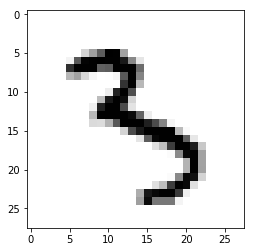

In [39]:
image_index = 569
plt.imshow(X_test[image_index].reshape(28, 28),cmap='Greys')

pred = cnn.predict(X_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())

Even though this is not a good handwriting of the number 3, the CNN model correctly classified it.

## Model accuracy for the validation dataset

In [42]:
Val_accuracy_cnn = cnn.evaluate(X_test, y_test)
Val_accuracy_cnn

10000/10000 [==============================] - 25s 2ms/step


[0.042473986373480876, 0.9858999848365784]

### A convolutional neural network has been shown to classify handwritten digits with Tensorflow’s Keras API. It has achieved an accuracy over 98.5% which is better than the accuracy of fully-connected neural networks.